Project to determine **trends and relationships** in a particular supermarket's daily data collection. You can check [here](http://www.kaggle.com/aungpyaeap/supermarket-sales) to download the data. The data is really interesting so, join me as we explore the data to find useful, interesting and salient information from the dataset.
1. First the data file in 'csv format' is parsed into pandas.read_csv() to enable the data to be read into the jupyter notebook. 
2. Afterwards we create a form of DataFrame(or a table) to show some properties of the features of the data( this is to know the level of cleaning the data requires).

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sales_data = pd.read_csv('supermarket_sales .csv', parse_dates= ['Date', 'Time'])
det = sales_data.count()
details = pd.DataFrame(det)
details.rename(columns={0: 'counts per column'}, inplace= True)
details['dtypes per column']= sales_data.dtypes
details['unique_values']= sales_data.nunique()
details

,counts per column,dtypes per column,unique_values
Invoice ID,1000,object,1000
Branch,1000,object,3
City,1000,object,3
Customer type,1000,object,2
Gender,1000,object,2
Product line,1000,object,6
Unit price,1000,float64,943
Quantity,1000,int64,10
Tax 5%,1000,float64,990
Total,1000,float64,990


From the table, it can be seen that the data does not have any missing values. One can also learn that the data is well structured. The deuctions show that the data does not need any cleaning so we move on to the Exploratory Data Analysis. To help with the analysis, we will use the data to answer some questions that will help us understand the data better. 


In [116]:
sales_data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [117]:
sales_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2020-04-06 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2020-04-06 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2020-04-06 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2020-04-06 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2020-04-06 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2020-04-06 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2020-04-06 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2020-04-06 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2020-04-06 15:33:00,Cash,65.82,4.761905,3.2910,4.1


*The first question goes thus*

1. what productline is in demand for more amongst all the productline

['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']


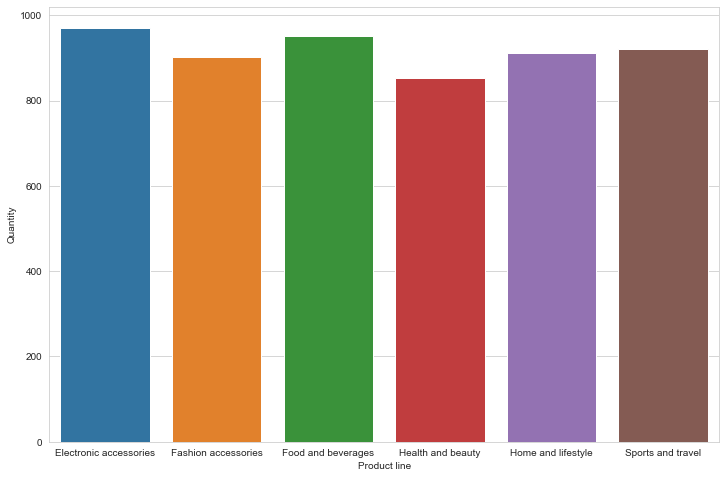

In [118]:
#we print out a list of the various categories in the product line
print(list(sales_data['Product line'].unique()))
#write a function to rename the categories, they are too long for plots
def rename(col):
    if col == 'Health and beauty':
        return 'H & B'
    elif col == 'Electronic accessories':
        return 'E'
    elif col == 'Home and lifestyle':
        return 'H & L'
    elif col == 'Sports and travel':
        return 'S & T'
    elif col == 'Food and beverages':
        return 'F & B'
    elif col == 'Fashion accessories':
        return 'F'
sales_data['Product line(abbr)']= sales_data['Product line'].apply(rename)

#now we use the groupby method to group the dataset by Product line
qdata= sales_data.groupby('Product line')['Quantity'].sum().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x= 'Product line', y= 'Quantity', data= qdata )

Now, taking a good look at the Barplot, we can see that the Productline that has the highest demand in terms of quantity bought is the **Electronic Accessories**. Another thing that is noteworthy again is that all the product lines are within the same range in terms of their overall demand. Before we draw a conclusion, let's see how the demand varies in the various branches in the supermarkets. 

,Product line,Product line(abbr)
0,Health and beauty,H & B
1,Electronic accessories,E
2,Home and lifestyle,H & L
3,Sports and travel,S & T
4,Food and beverages,F & B
5,Fashion accessories,F


<Figure size 864x576 with 0 Axes>

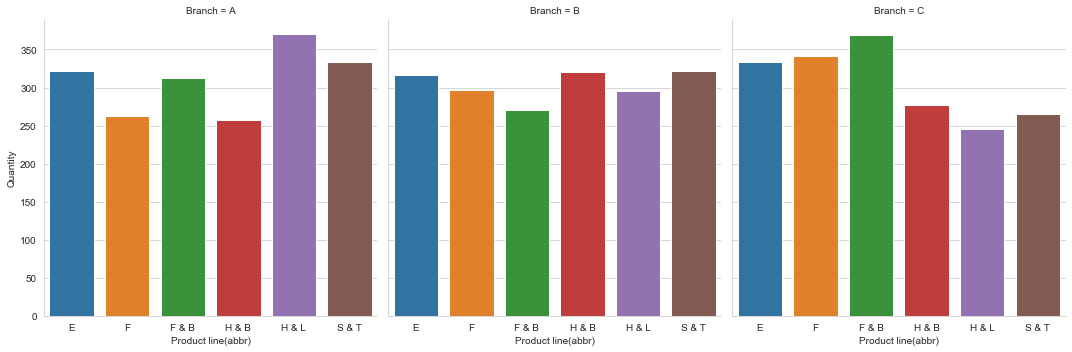

In [119]:
qdata1 = sales_data.groupby(['Product line(abbr)', 'Branch'])['Quantity'].sum().reset_index()
plt.figure(figsize=(12,8))
sns.catplot(x= 'Product line(abbr)', y= 'Quantity', col = 'Branch', kind = 'bar', data= qdata1 )
sales_data.filter(['Product line', 'Product line(abbr)']).drop_duplicates().reset_index(drop = True)

I was able to divide the plots into the three branches. From the plots, it is evident that the trends vary according to the branches. If we conclude on the information we could retrieve from the previous bar plot where we ignored the branches and analysed the supermarket as a whole, we would be making a huge mistake. These plots show that to really understand or draw salient information from the dataset we should not neglect the categories and we should try study trends by category and see why the trends go in the direction in which they go.

**INSIGHT FROM BARPLOT**

1. The plot,*home and lifestyle* has the highest demand in branch A, *Health and Beauty* have the highest demand in branch B, and for branch C it's *Food and Beverage* . None of the plots look alike in terms of the levels of the bars. Now the question is that, why the difference for each branch?. The data has to give a clue
2. we will notice again that no three product lines are the same(in terms of the quantity of the product line that was bought) for the three branches.

The varying difference in demand in the various branches indicates difference in the general taste and preference of the people in that perimeter. It further indicates difference in the population of predominant personality across the three branches. 

In the graph, the only column that talks about personality is the *Gender*. Therefore let's see the difference in population of the 'male' and 'female' for each product line in each branch to know why the trend varies for each branch

,Product line,Product line(abbr)
0,Health and beauty,H & B
1,Electronic accessories,E
2,Home and lifestyle,H & L
3,Sports and travel,S & T
4,Food and beverages,F & B
5,Fashion accessories,F


<Figure size 1152x720 with 0 Axes>

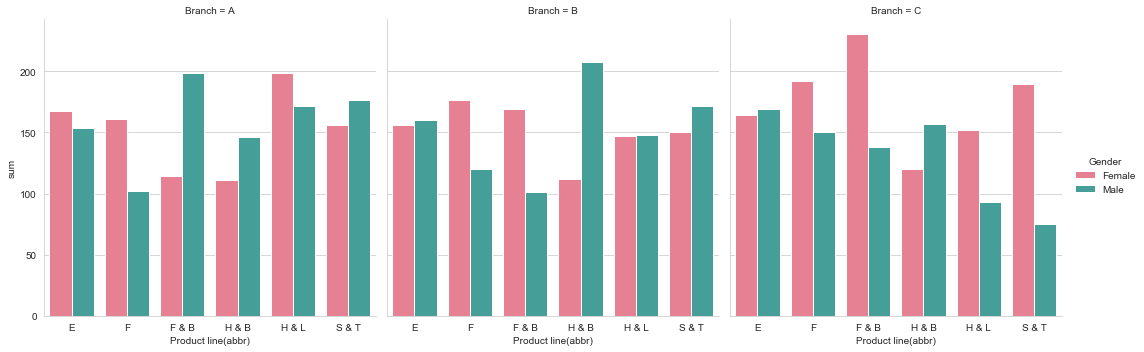

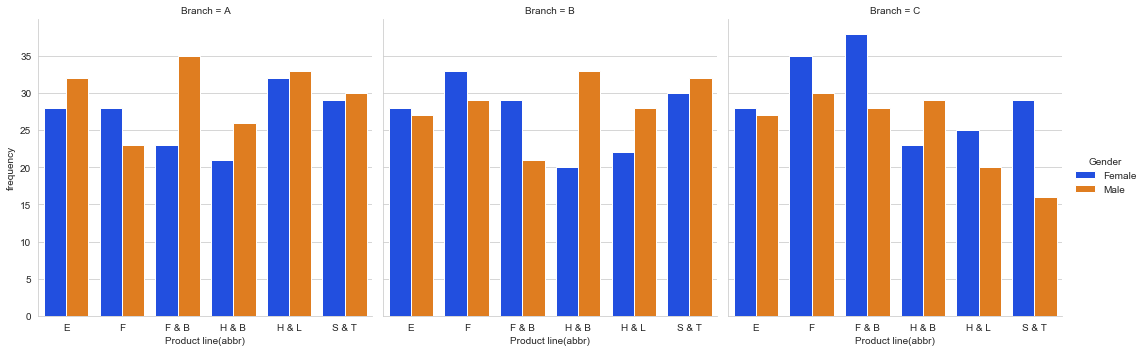

In [120]:
#The X axis will be to cumbersome so we can use the abbr versions of the product line
def frequency(data):
    output = data.count()
    return output
qdata2 = sales_data.groupby(['Product line(abbr)', 'Branch', 'Gender'])['Quantity'].agg([frequency, sum]).reset_index()
qdata2
plt.figure(figsize=(16,10))
for y in [['sum', 'husl'], ['frequency', 'bright']]:
    sns.catplot(x= 'Product line(abbr)', y= y[0], hue = 'Gender', col = 'Branch', kind = 'bar',palette =y[1], data= qdata2 )
sales_data.filter(['Product line', 'Product line(abbr)']).drop_duplicates().reset_index().drop('index', axis =1)


The top row is a plot between the **Product line** and the Quantity of the product line bought while the second row is a plot between the **Product line** and the **population** of people that bought them. 

1. With very few exceptions, we can see that the Quantity has a form of correlation with the population of people that came to buy ( the exceptions can be understood as quantity isn't just dependent on population alone but on the financial capacitiy of buyers as well(which cannot be controlled).

2. The barplot was plotted with a hue(male and female), the Product line with the highest demand for branch A happens to be **home and lifestyle**. Notice carefully that for all the branches, the females contribute more to the demand for **home and lifestyle** product line. It can be inferred that, one of the reasons why **Home and lifestyle** is the highest in demand for branch A is that their populated with more females than the rest branches. 

3. The case is the same for the **Health and Beauty** also. The males are more than the females for all three branches. Ofcourse it makes a little bit of sense, cause males buy most of the cosmetics and ladies stuff for their women( this is just an evidence). Even as males contribute more to the quantity bought for Health and beauty for all three branches, it is predominant in branch A indicating tha male customers there are generally more than female customers for all three branches.

4. There is a little bit of anomaly in the **Food and Beverage** in the Branch A. The other two branches have their customers populated more with females than males, but the reverse is the case with branch A. This shows that other factors affect the demand for product lines apart from the population buying. It could be the preference of the customers, the type of jobs that majority of the males have in the various branches ( the branches are located in different cities so certain factors can differ from branch to branch).

One beautiful thing the data gives is that, each branch can know the product line that gives brings in more of the income to the branch if the quantity bought affects the total cash inflow.
*a quick code is done next to show the product line that is responsible for most of the cash in fow for all three branches.*


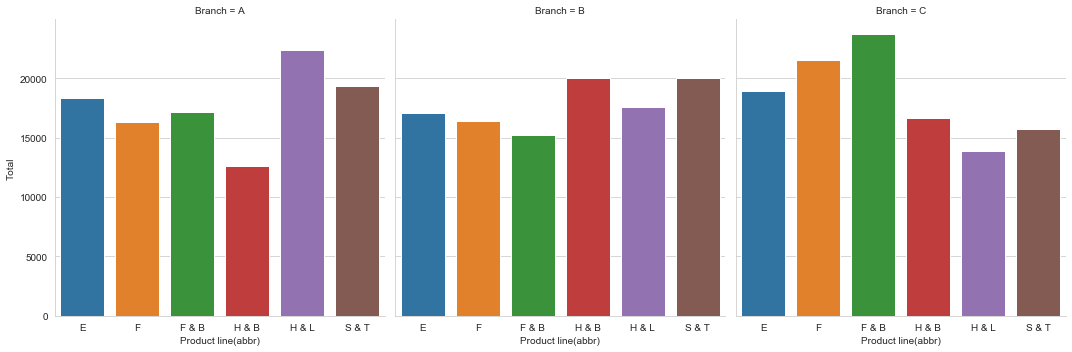

In [121]:
qdata3= sales_data.groupby(['Product line(abbr)', 'Branch'])['Total'].sum().reset_index()
qdata3['Quantity']=sales_data.groupby(['Product line(abbr)', 'Branch'])['Quantity'].sum().reset_index().Quantity
sns.catplot(x= 'Product line(abbr)', y= 'Total', col = 'Branch', kind = 'bar', data= qdata3 )

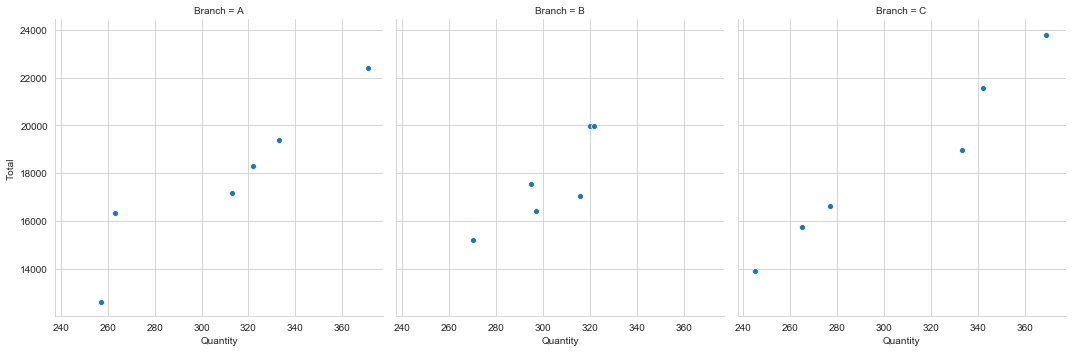

In [122]:
sns.relplot(x= 'Quantity', y= 'Total', col = 'Branch', kind = 'scatter', data= qdata3 )

As it is, the product lines with the highest demands for the three branches are the same product lines contributing more to the total cash inflow for the three branches. The scatterplot also shows a strong relationship between Quantity bought and the Total cash inflow for all three branches.

**IS THERE A RELATIONSHIP THAT EXISTS BETWEEN _UNIT PRICE_ AND _QUANTITY_?**

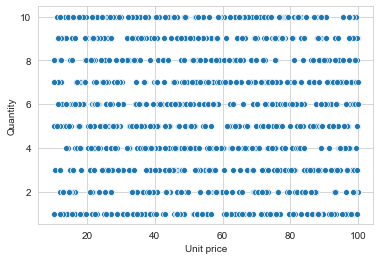

In [123]:
sns.scatterplot(x= 'Unit price', y= 'Quantity', data= sales_data)

From the scatterplot it is safe to say there is not relationship between the _unit price_ and the _Quantity_

**_PAYMENT TYPE_ VERSUS _TOTAL_ AMOUNT SPENT FOR EACH BUYER?**

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Product line(abbr)
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2020-04-06 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,H & B
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2020-04-06 10:29:00,Cash,76.40,4.761905,3.8200,9.6,E
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2020-04-06 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,H & L
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2020-04-06 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,H & B
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2020-04-06 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,S & T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2020-04-06 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,H & B
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2020-04-06 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,H & L
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2020-04-06 13:22:00,Cash,31.84,4.761905,1.5920,7.7,F & B
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2020-04-06 15:33:00,Cash,65.82,4.761905,3.2910,4.1,H & L


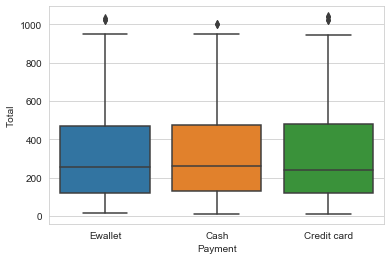

In [124]:
sns.boxplot(x= 'Payment', y = 'Total', data=sales_data)
sales_data

In [125]:
sales_data2= sales_data.groupby('Payment')['Total'].sum()
payment_type= pd.DataFrame(sales_data2)
payment_type['frequency']= sales_data.groupby('Payment').size()
payment_type ['Quantity']= sales_data.groupby('Payment')['Quantity'].sum()
payment_type

,Total,frequency,Quantity
Payment,,,
Cash,112206.570,344,1896
Credit card,100767.072,311,1722
Ewallet,109993.107,345,1892


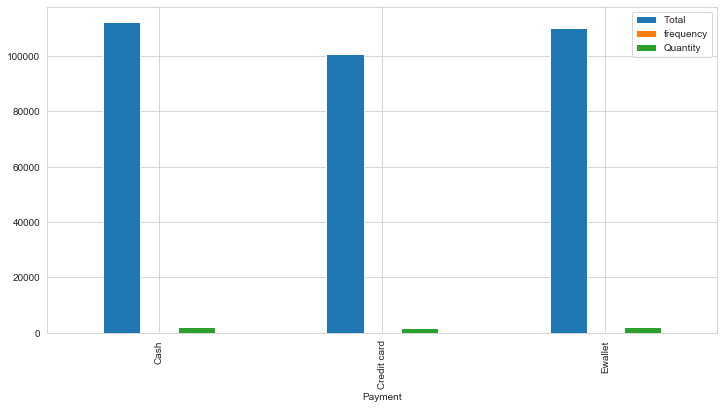

In [126]:
payment_type.plot(kind='bar', figsize=(12,6))

From the table/Dataframe **_payment_type_** it is explicit that the total Quantity for each payment type has an obvious relationship with the payment type fequently used the most. Before we draw conclusion we will see how this works with all three branches.
We can also see that the credit is least used for payment transactions that is if we generalise it. It will make more sense if we see it through the three branches.

,Payment,Branch,frequency,sum,Quantity
0,Cash,A,110.0,33781.2510,572
1,Cash,B,110.0,35339.4615,628
2,Cash,C,124.0,43085.8575,696
3,Credit card,A,104.0,33094.7505,580
4,Credit card,B,109.0,37344.8565,599
5,Credit card,C,98.0,30327.4650,543
6,Ewallet,A,126.0,39324.3690,707
7,Ewallet,B,113.0,33513.3540,593
8,Ewallet,C,106.0,37155.3840,592


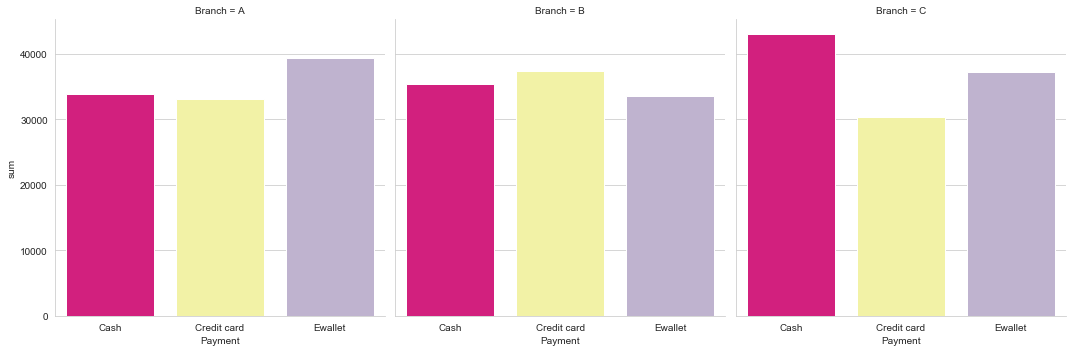

In [127]:
payment = sales_data.groupby(['Payment', 'Branch'])['Total'].agg([frequency, sum]).reset_index()
payment['Quantity']=  sales_data.groupby(['Payment', 'Branch'])['Quantity'].sum().reset_index().Quantity
payment
sns.catplot(x='Payment', y= 'sum', col= 'Branch', kind ='bar', data = payment, palette='Accent_r')
sns.set_style('whitegrid')
payment

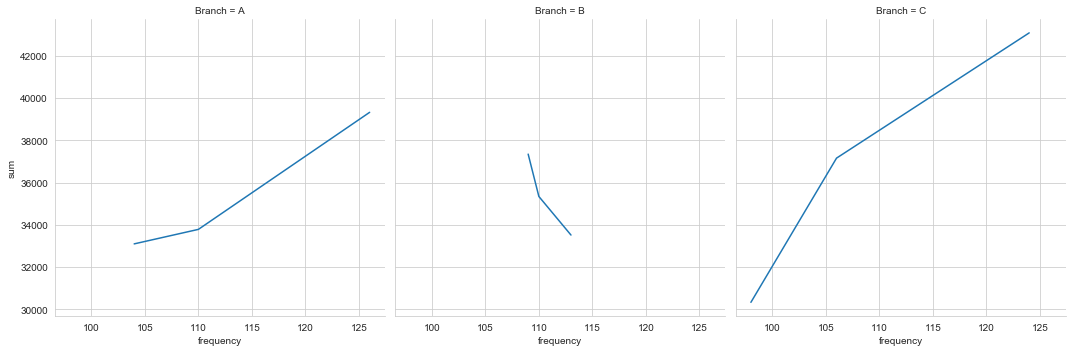

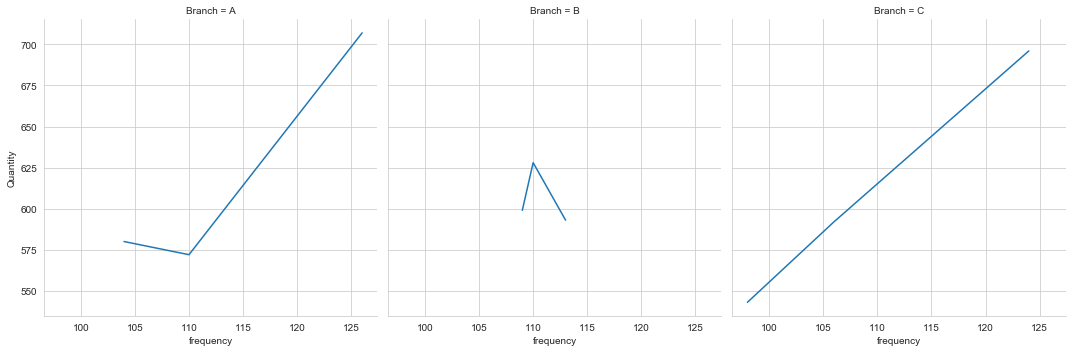

In [128]:
for y in ['sum', 'Quantity']:
    sns.relplot(x='frequency', y=y, kind='line', col='Branch', data= payment )

Isn't this lovely, from the barplot we can see the predominant payment type for all three branches. For branch A it's the **_E wallet users_**, while for branch B it's the **_credit card_** users finally for brach C the people who pay in **_cash_** contribute more to the overall cash inflow. The three branches have their uniqueness.

For the relationship between the number of people buying with the Total cash inflow as well as the Quantity bought is linear and upward apart from branch B. We cannot bank on the line graph because we do not have enough data to validate our claim.If the supermarket can provide enough data for the remaining months, then we can get a more confident inference.

**CUSTOMER TYPE ANALYSIS**

In [129]:
CL= sales_data.groupby(['Customer type', 'Payment',])['Total'].sum().reset_index()
CL

,Customer type,Payment,Total
0,Member,Cash,54661.0155
1,Member,Credit card,57771.4725
2,Member,Ewallet,51790.9560
3,Normal,Cash,57545.5545
4,Normal,Credit card,42995.5995
5,Normal,Ewallet,58202.1510


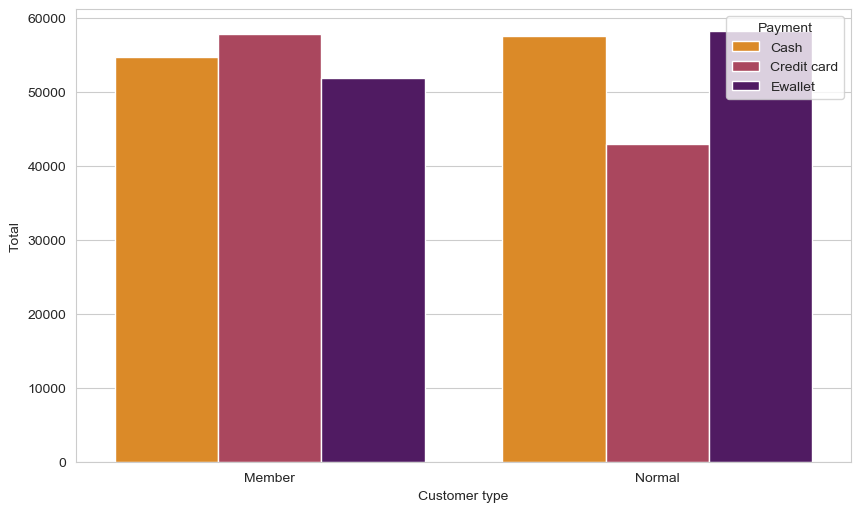

In [130]:
plt.figure(figsize=(10,6), facecolor= 'w', dpi=100)
sns.barplot(x= 'Customer type', y='Total', hue='Payment', data=CL, capsize = 0.1, palette='inferno_r')

<Figure size 1000x600 with 0 Axes>

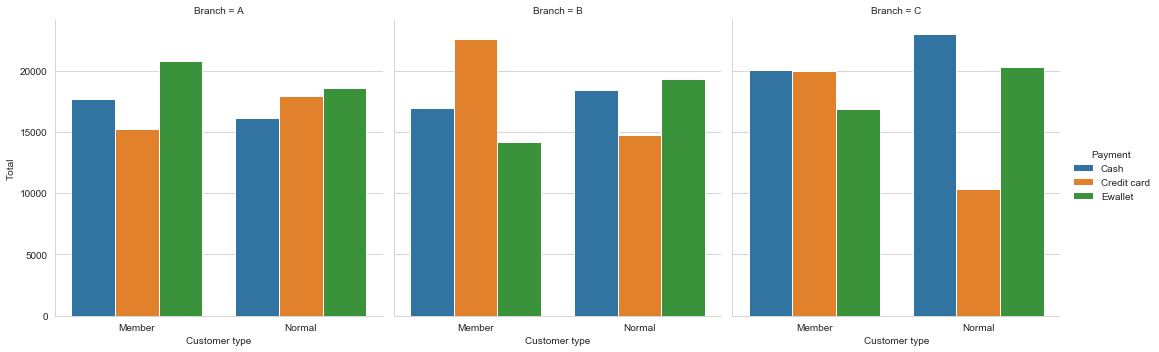

<Figure size 1000x600 with 0 Axes>

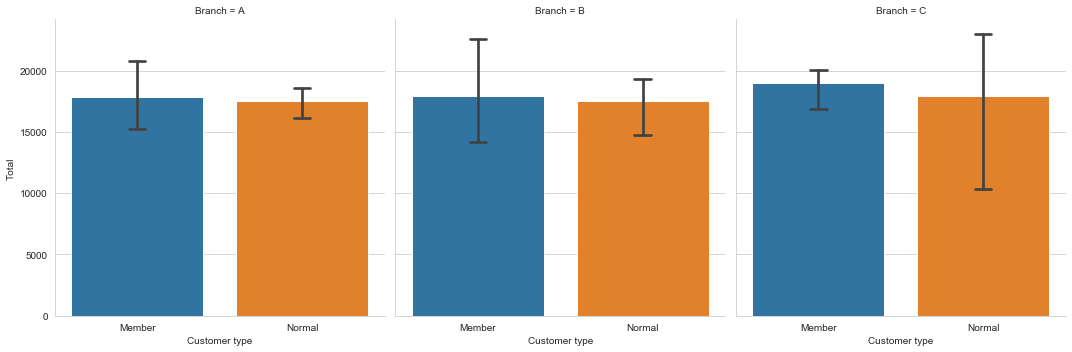

In [131]:
CL1= sales_data.groupby(['Customer type', 'Payment','Branch'])['Total'].sum().reset_index()
for hue in ['Payment', None]:
    plt.figure(figsize=(10,6), facecolor= 'w', dpi=100)
    sns.catplot(x= 'Customer type', y='Total', hue=hue, col='Branch', kind='bar', data=CL1, capsize = 0.1)

For all three branches, each customer type(Member, Normal) seem to have slight diffeence in the overall contribution to the cash inflow. So either of the two are important and worthy of attnetion. Breaking them down into the payment types for each customer type, one can see the payment type that is more predominant for all three branches.

**EXPLORATORY DATA ANALYSIS USING TIME**

In [132]:
#First we create three columns, month, day and hour
sales_data['month']= sales_data['Date'].dt.month
sales_data['day']= sales_data['Date'].dt.day
sales_data['hour']= sales_data['Time'].dt.hour
dates= sales_data.sort_values(by= 'Date')
dates

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Product line(abbr),month,day,hour
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,...,2020-04-06 19:31:00,Cash,168.96,4.761905,8.448,6.3,F & B,1,1,19
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,...,2020-04-06 13:55:00,Cash,591.66,4.761905,29.583,7.7,F,1,1,13
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,...,2020-04-06 14:47:00,Cash,380.72,4.761905,19.036,5.7,H & L,1,1,14
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,...,2020-04-06 20:26:00,Ewallet,108.16,4.761905,5.408,6.9,S & T,1,1,20
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,...,2020-04-06 11:43:00,Cash,125.74,4.761905,6.287,5.0,H & B,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,...,2020-04-06 14:43:00,Ewallet,874.98,4.761905,43.749,6.0,H & B,3,30,14
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,...,2020-04-06 12:51:00,Credit card,81.44,4.761905,4.072,9.5,F,3,30,12
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,...,2020-04-06 20:37:00,Cash,290.46,4.761905,14.523,6.7,E,3,30,20
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,...,2020-04-06 10:18:00,Cash,447.40,4.761905,22.370,7.4,S & T,3,30,10


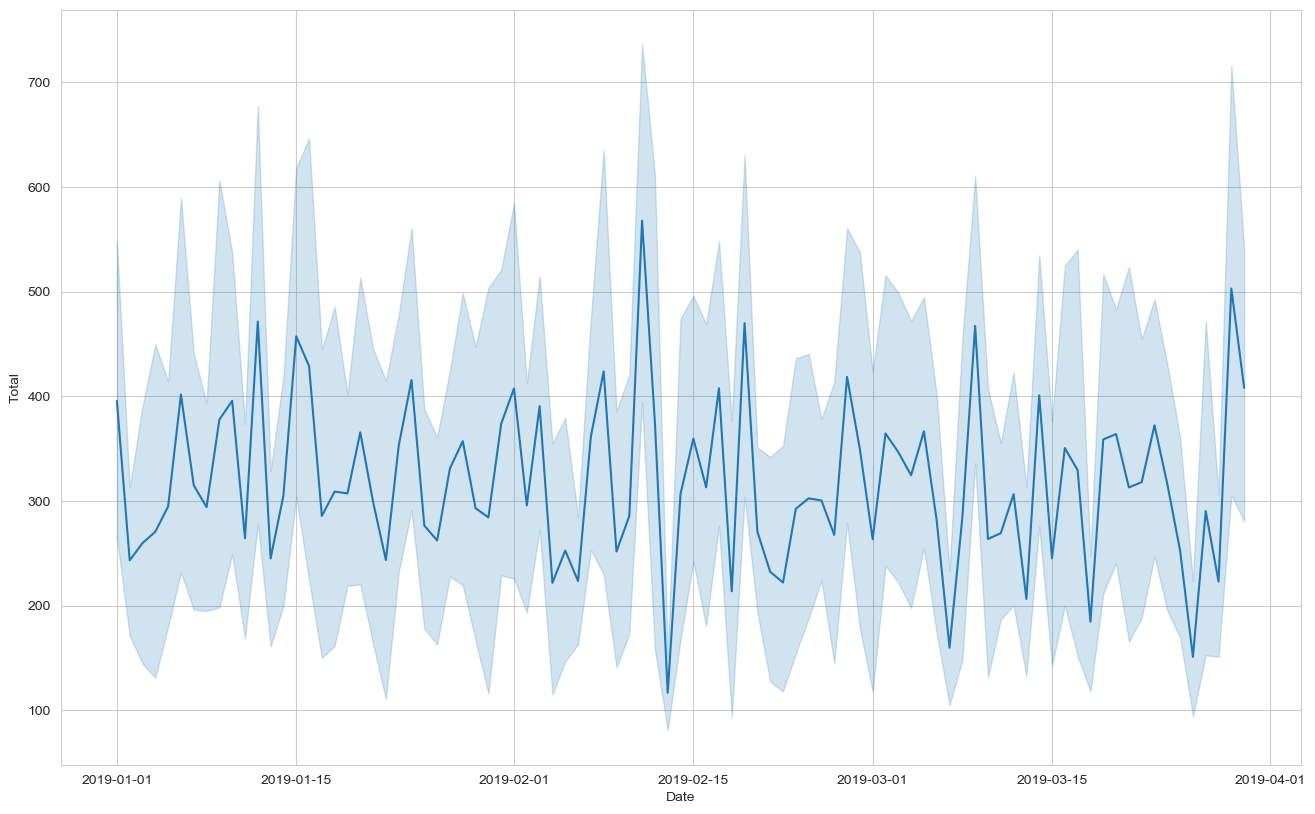

In [133]:
plt.figure(figsize=(16,10), facecolor= 'w', dpi=100)
sns.lineplot(x='Date', y='Total', data=dates)

The total cash inflow fluctuates throughout the month. It will be reasonable to find out what causes the fluctuation. What variable changes that in turn causes the change in the total cash inflow for the supermarkets across the days and months. 

First let's  see the linechart for each Branch

In [142]:
dates1= dates.groupby(['Date', 'Branch'])['Total'].sum().reset_index()
dates1

,Date,Branch,Total
0,2019-01-01,A,2371.3200
1,2019-01-01,B,1536.6960
2,2019-01-01,C,837.1650
3,2019-01-02,A,307.0515
4,2019-01-02,B,1162.8015
...,...,...,...
258,2019-03-29,B,2059.9320
259,2019-03-29,C,985.6980
260,2019-03-30,A,1320.6165
261,2019-03-30,B,1724.4570


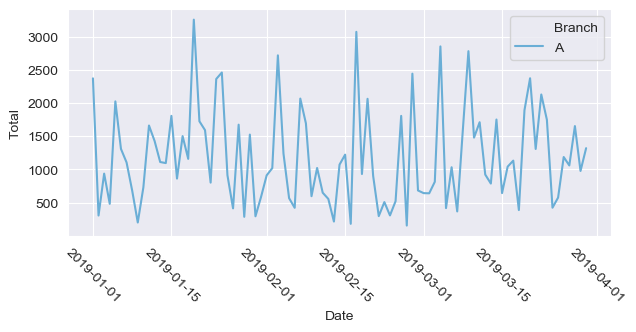

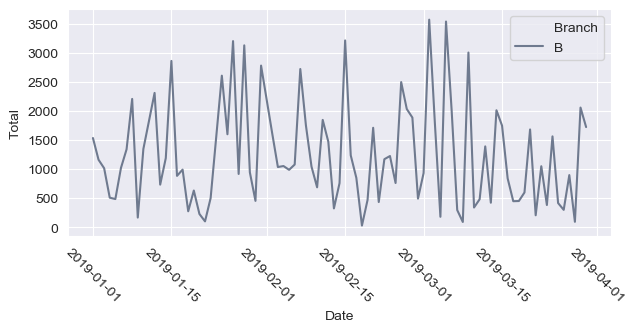

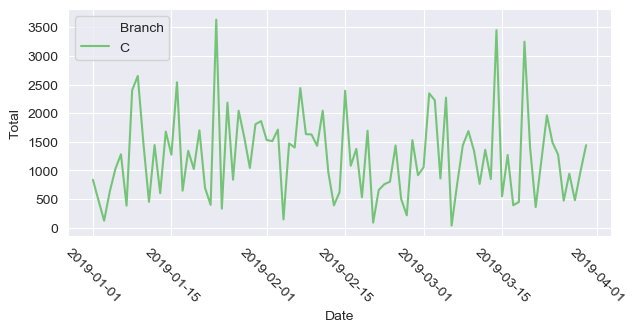

In [145]:
for branch in [['A','Blues' ], ['B', 'bone_r'], ['C', 'Greens']]:
    datedata = dates1[dates1['Branch']== branch[0]]
    plt.figure(figsize=(7,3), facecolor= 'w', edgecolor = 'r', dpi=100)
    plt.xticks(rotation = -45) 
    sns.lineplot(x='Date', y= 'Total', hue = 'Branch', data= datedata, palette= branch[1], ci= None)
    sns.set_style('darkgrid')
    #plt.plot(color=branch[1])

In [136]:

sales1= sales_data.groupby(['month', 'Branch'])['Total'].sum().reset_index()
sales2 = sales_data.groupby(['month', 'Branch'])['Total'].count().reset_index()

sales1['count']= sales2['Total']
sales1

,month,Branch,Total,count
0,1,A,38681.1285,119
1,1,B,37176.0585,111
2,1,C,40434.6810,122
3,2,A,29860.1205,94
4,2,B,34424.2710,109
5,2,C,32934.9825,100
6,3,A,37659.1215,127
7,3,B,34597.3425,112
8,3,C,37199.0430,106


In [147]:
time_data=sales_data.groupby(['day', 'month', 'Branch'])['Total'].sum().reset_index()
time_data['People/day']= sales_data.groupby(['day', 'month', 'Branch'])['Total'].count().reset_index().Total
time_data

,day,month,Branch,Total,People/day
0,1,1,A,2371.3200,5
1,1,1,B,1536.6960,3
2,1,1,C,837.1650,4
3,1,2,A,911.9355,3
4,1,2,C,1532.6010,3
...,...,...,...,...,...
258,30,3,B,1724.4570,3
259,30,3,C,1441.9860,4
260,31,1,A,588.1575,3
261,31,1,B,2782.2795,7


<Figure size 1000x300 with 0 Axes>

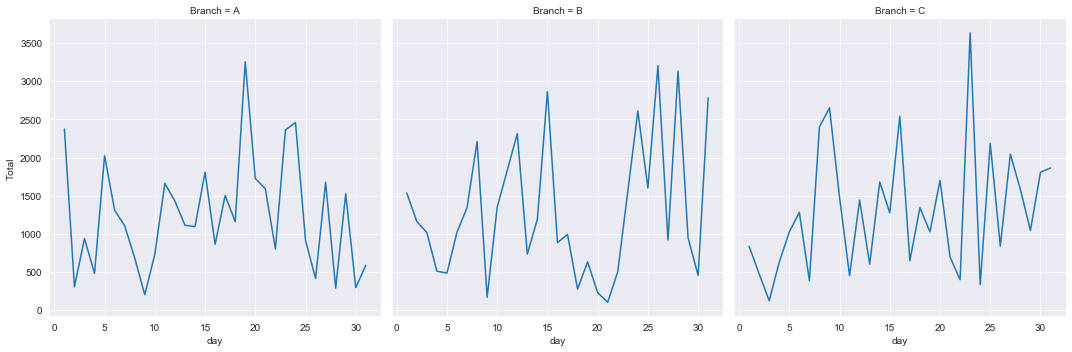

<Figure size 1000x300 with 0 Axes>

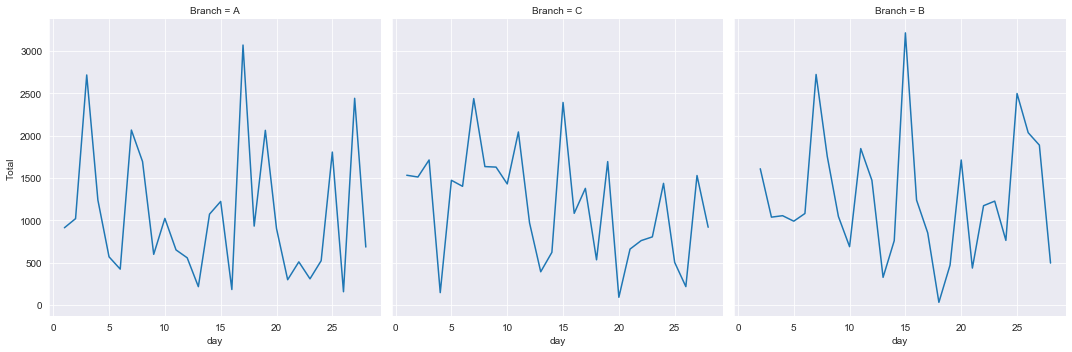

<Figure size 1000x300 with 0 Axes>

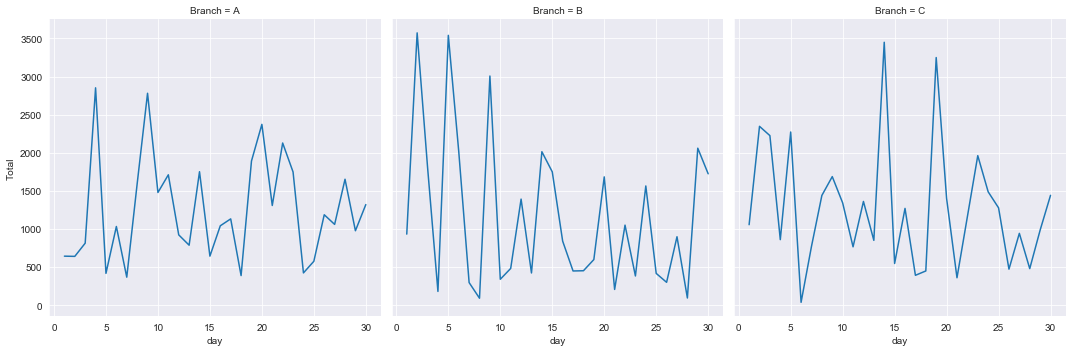

In [154]:
number =[1,2,3]
for month in number:
    data = time_data[time_data['month']== month]
    plt.figure(figsize=(10,3), facecolor= 'w', dpi=100)
    sns.relplot(x='day', y='Total', kind='line', col= 'Branch', col_wrap=3, data=data)
    

<Figure size 1000x300 with 0 Axes>

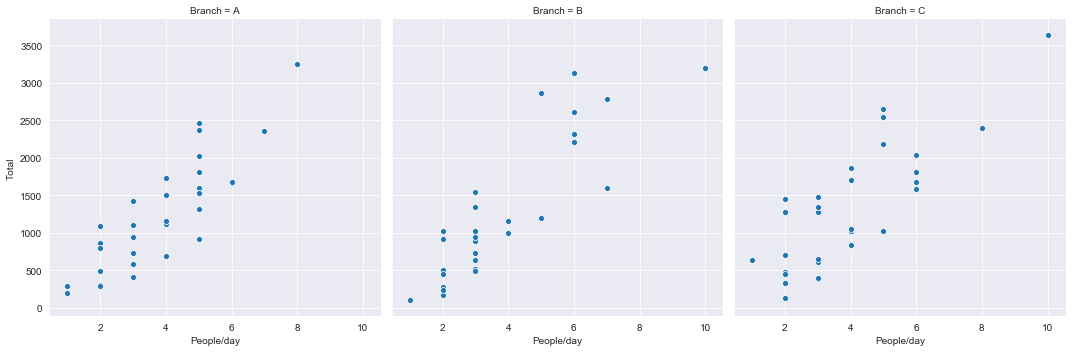

<Figure size 1000x300 with 0 Axes>

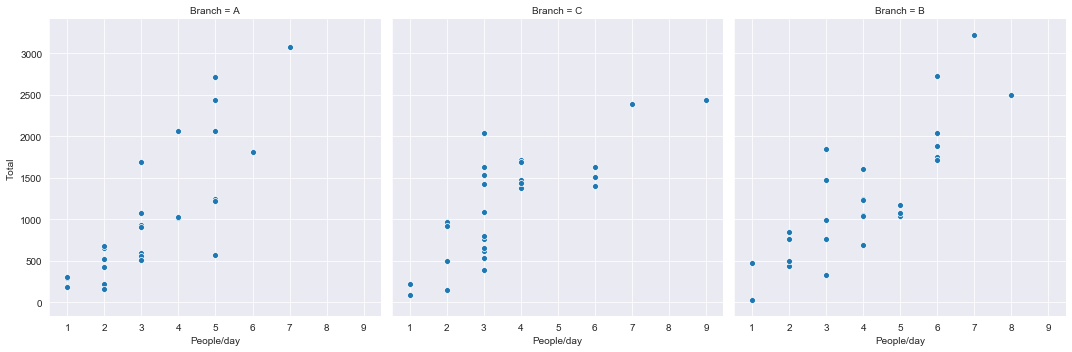

<Figure size 1000x300 with 0 Axes>

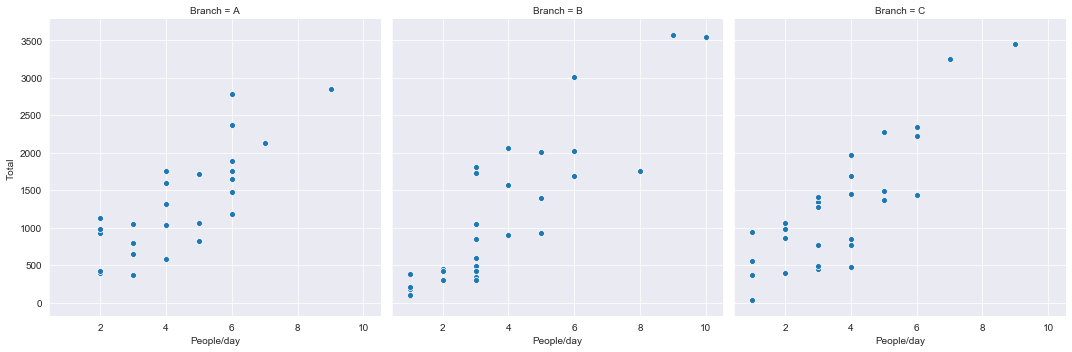

In [156]:
number =[1,2,3]
for month in number:
    data = time_data[time_data['month']== month]
    plt.figure(figsize=(10,3), facecolor= 'w', dpi=100)
    sns.relplot(x='People/day', y='Total', kind='scatter', col='Branch', col_wrap=3,data=data)

In [158]:
time_data['quantity']=sales_data.groupby(['day', 'month', 'Branch'])['Quantity'].sum().reset_index().Quantity
time_data.corr()['Total']

day          -0.024553
month        -0.025251
Total         1.000000
People/day    0.830119
quantity      0.913680
Name: Total, dtype: float64

The Variables that have the strongest relationship with the Total  amount for goods bought are the quantity bought and the People/daty that come to ourchase one product line or the other.

This indicates that when there is a drop in the time graph, the people that came to buy that day as well as the quantity bought dropped. The quantity brought can be made steady if the number of people that come in per day are steady.

If the data covers several months and years, we could see how the maximum number of people that buy per day increase across the years and the increment in th total goods bought also. That way, our insight can be validated more.